# RPiS - Laboratoria #1

## Środowisko pracy

Na zajęciach będziemy korzystać z języka Python 3.8 oraz zestawu konkretnych pakietów. Na własną odpowiedzialność można korzystać z innych wersji Pythona. Poprzednie wersje Pythona (w szczególności 2.x) są niezalecane! Jeżeli ktoś nie używał wcześniej Pythona to polecam przejść przez sekcje [Learn the Basics tutaj](https://www.learnpython.org/).


1. Ściągnąć repozytorium przedmiotu: `git clone hhttps://github.com/gmum/rpis_2022_lab.git` <br>
(Można również ściągnąć zipa repozytorium "ręcznie")


2. Sciągnąć miniconde: https://conda.io/en/latest/miniconda.html (Niewymagane jeśli zainstalowana jest Anaconda) <br>
Na windowsie: uruchomić `Anaconda Prompt`


3. Stworzyć środowisko razem z wymaganymi paczkami:<br>
`conda create --name ml python=3.8 numpy scipy matplotlib jupyter notebook`


4. Aktywować środowisko:<br>
Unix/MacOS: conda activate ml<br>
Windows: w Anaconda Prompt: activate ml<br>


5. W folderze repo odpalić serwer jupytera: `jupyter notebook` <br>
Sprawdzić w przeglądarce czy wszystko działa<br>

### Test Środowiska

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Wybrane elementy pakietów numpy, scipy, matplotlib

### numpy
Pakiet numpy implementuje (bądź pozwala zaimplementować) większość operacji jakie będą potrzebne do operowania na (wielowymiarowych) tablicach. Dodatkowo implementacja jest znacznie wydajniejsza niż czysty Python.

### Zadanie 1.
Używając "magii" jupytera `%%timeit` porównać czasy wykonania sumowania 10000 całkowitych liczb losowych z przedziału [1,10] używając czystego Pythona i numpy.

In [41]:
%%timeit
import random
sum=0
for _ in range (10000):
    sum= sum+random.randrange(1,10)

95.5 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%%timeit
import numpy as np
sampl = np.random.uniform(low=1, high=10, size=(10000,))
np.sum(sampl)

359 µs ± 85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 2.
Napisz wydajniejszą formę następujących funkcji. Porównaj szybkość wywołania oryginalnych funkcji i ich odpowiedników z numpy.

In [56]:
%%timeit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

924 ns ± 203 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [69]:
%%timeit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = np.sum(np.power(x,3))
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    xn = np.array(x)
    xn-m
    result = np.sum(np.power(xn,4))
    result /= len(x)
    return result

594 ns ± 95.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Zadanie 3.
Wykorzystujac broadcasting (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice  taką, że

$$\large A_{ij} = i \cdot j \quad \forall i,j \in \{1,\ldots,10\} $$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym pętli/comprehensions?
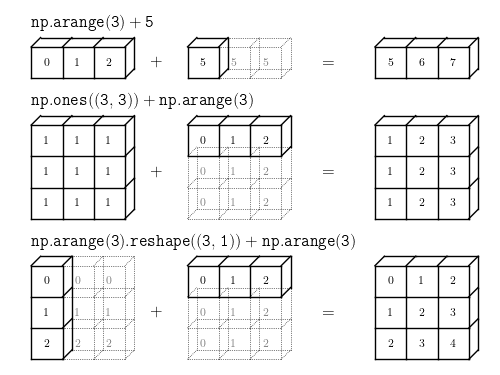

In [76]:
np.fromfunction(lambda i,j : (i+1)*(j+1),(10,10))

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
       [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])

### numpy.random
Pakiet [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html) udostępnia szereg zaimplementowanych funkcji do losowania z wielu rozkładów prawdopodobieństwa. Większość tych funkcji przyjmuje zadane dla danego rozkładu parametry oraz argument `size`, który mówi ile próbek zwrócić.

In [77]:
# rozkład jednostajny
np.random.uniform(low=0, high=1, size=10)

array([0.95382227, 0.98044843, 0.41735309, 0.27294645, 0.3148823 ,
       0.31687856, 0.15067419, 0.77817134, 0.34452174, 0.82612277])

In [78]:
# rozkład normalany
np.random.normal(loc=0, scale=1, size=3)

array([-0.06178751,  1.08371037,  1.25319297])

### Zadanie 4.
Sprawdzić empirycznie paradoks [Monty'ego Halla](https://en.wikipedia.org/wiki/Monty_Hall_problem).

In [94]:
trials_number = 100000
price = np.random.randint(low=0,high=3,size = trials_number)
pick = np.random.randint(low=0,high=3,size = trials_number)
print((price==pick).sum()/trials_number)

#zmiana
price = np.random.randint(low=0,high=3,size = trials_number)
pick = np.random.randint(low=0,high=3,size = trials_number)
print((price!=pick).sum()/trials_number)

0.33337
0.66701


### matplotlib.pyplot
Pakiet `matplotlib` udostępnia szereg funkcjonalności do wizualizacji wszelkiego rodzaju. 

In [85]:
import matplotlib.pyplot as plt

# kosmetyka
plt.rcParams['axes.grid'] = True  
plt.rcParams['figure.dpi'] = 100

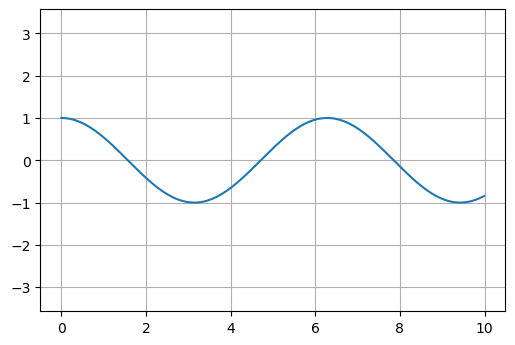

In [86]:
x = np.arange(0, 10, 0.01)
y = np.cos(x)

plt.plot(x, y)
_ = plt.axis('equal')

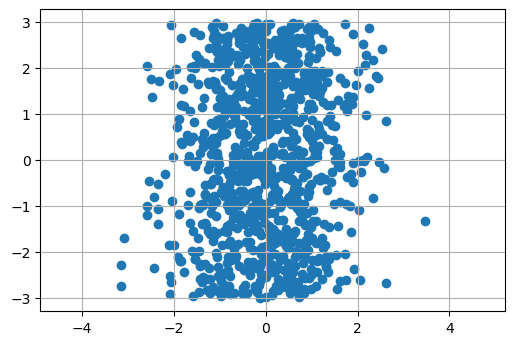

In [87]:
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.uniform(-3, 3, size=1000)

plt.scatter(x, y)
_ = plt.axis('equal')

### Zadanie 5.
Sprawdź empirycznie Centralne Twierdzenie Graniczne (tw. Lindeberga-Levy’ego) dla dowolnych wartości średniej $\mu$ i wariancji $\sigma^2$. Zwizualizuj rozkład sum z pomocą `plt.hist`.

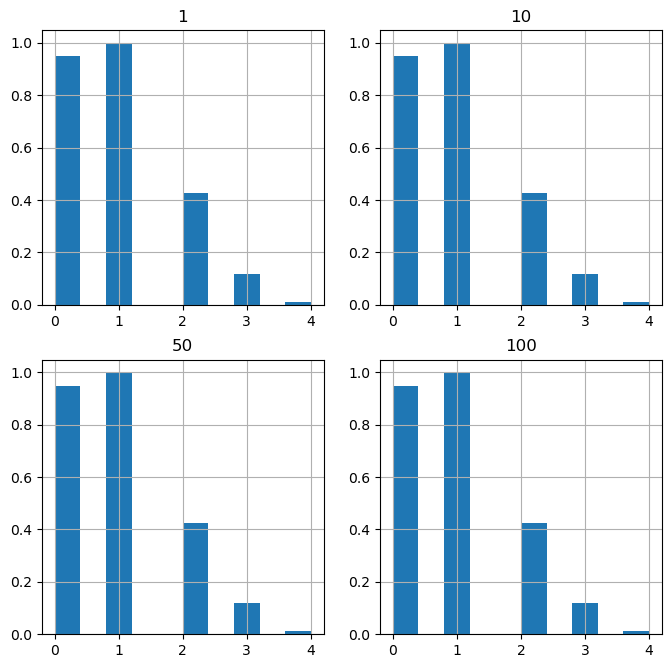

In [93]:
import numpy
import matplotlib.pyplot as plt
 
# number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [np.random.binomial(9, 0.1, 1000)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

### Zadanie 6.
Sprawdź empirycznie specjalny przypadek CLT dla próbek z rozkładu Bernoulliego (tw. de Moivre’a-Laplace’a). <br>*Wskazówka:* `np.random.binomial`

### Zadanie 7. 

Wylosuj współrzędne 1000 punktów na płaszczyźnie z rozkładu normalnego (*i.i.d* dla obu współrzędnych) o dowolnej średniej $\mu$ i wariancji $\sigma^2$. Zwizualizuj prawo dwóch sigm kolorując przykłady w zależności od ich odległości od średniej:

* na zielono dla: $d(x, \mu) < \sigma$
* na pomarańczowo dla: $\sigma < d(x, \mu) < 2\sigma$
* na czerwono dla: $2\sigma < d(x, \mu)$

gdzie $d(\cdot, \cdot)$ to odległość euklidesowa. <br> 

a) Sprawdź ile punktów jest w danym kolorze. Jak to się ma do wariantu jednowymiarowego? <br>
b) Jak to będzie wyglądało w 100 wymiarach? Możesz narysować jak wygląda średnia odległość próbek od średniej dla rosnącej liczby wymiarów.

*Wskazówka*: parametr `c` funkcji [`plt.scatter`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html)